# 建模与调参
**介绍：**

此部分主要介绍模型的应用和调参

**目的：**

- 学习在金融分控领域常用的机器学习模型
- 学习机器学习模型的建模过程与调参流程

**主要内容：**

- 逻辑回归模型：
  - 理解逻辑回归模型；
  - 逻辑回归模型的应用；
  - 逻辑回归的优缺点；
- 树模型：
  - 理解树模型；
  - 树模型的应用；
  - 树模型的优缺点；
- 集成模型
  - 基于bagging思想的集成模型
    - 随机森林模型
  - 基于boosting思想的集成模型
    - XGBoost模型
    - LightGBM模型
    - CatBoost模型
- 模型对比与性能评估：
  - 回归模型/树模型/集成模型；
  - 模型评估方法；
  - 模型评价结果；
- 模型调参：
  - 贪心调参方法；
  - 网格调参方法；
  - 贝叶斯调参方法； 



**文件说明：**

数据来源为“天池”的学习赛：*零基础入门金融风控-贷款违约预测*

以下代码主要参考该比赛的开源代码

比赛项目地址：https://tianchi.aliyun.com/competition/entrance/531830/forum

开源地址：https://tianchi.aliyun.com/notebook-ai/detail?spm=5176.12586969.1002.3.3b3068564LnuOR&postId=129346

## 模型相关原理介绍

由于相关算法原理篇幅较长，因此推荐了一些博客与教材供初学者们进行学习。

- 逻辑回归模型

https://blog.csdn.net/han_xiaoyang/article/details/49123419

- 决策树模型

https://blog.csdn.net/c406495762/article/details/76262487

- GBDT模型

https://zhuanlan.zhihu.com/p/45145899

- XGBoost模型

https://blog.csdn.net/wuzhongqiang/article/details/104854890

- LightGBM模型

https://blog.csdn.net/wuzhongqiang/article/details/105350579

- Catboost模型

https://mp.weixin.qq.com/s/xloTLr5NJBgBspMQtxPoFA

## 模型对比与性能评估

**逻辑回归：**

- 优点

  - 训练速度较快，分类的时候，计算量仅仅只和特征的数目相关；
  - 简单易理解，模型的可解释性非常好，从特征的权重可以看到不同的特征对最后结果的影响；
  - 适合二分类问题，不需要缩放输入特征；
  - 内存资源占用小，只需要存储各个维度的特征值；

- 缺点

  - **逻辑回归需要预先处理缺失值和异常值【可参考task3特征工程】；**
  - 不能用Logistic回归去解决非线性问题，因为Logistic的决策面是线性的；
  - 对多重共线性数据较为敏感，且很难处理数据不平衡的问题；
  - 准确率并不是很高，因为形式非常简单，很难去拟合数据的真实分布； 

    
<br>

**决策树模型：**

- 优点

  - 简单直观，生成的决策树可以可视化展示
  - **数据不需要预处理，不需要归一化，不需要处理缺失数据**
  - 既可以处理离散值，也可以处理连续值

- 缺点

  - 决策树算法非常容易过拟合，导致泛化能力不强（可进行适当的剪枝）
  - 采用的是贪心算法，容易得到局部最优解

  
**集成模型集成方法（ensemble method）：**

通过组合多个学习器来完成学习任务，通过集成方法，可以将多个弱学习器组合成一个强分类器，因此集成学习的泛化能力一般比单一分类器要好。

集成方法主要包括Bagging和Boosting，Bagging和Boosting都是将已有的分类或回归算法通过一定方式组合起来，形成一个更加强大的分类。两种方法都是把若干个分类器整合为一个分类器的方法，只是整合的方式不一样，最终得到不一样的效果。常见的基于Baggin思想的集成模型有：随机森林、基于Boosting思想的集成模型有：Adaboost、GBDT、XgBoost、LightGBM等。 

> **Baggin和Boosting的区别总结如下：**

  - **样本选择上：** Bagging方法的训练集是从原始集中有放回的选取，所以从原始集中选出的各轮训练集之间是独立的；而Boosting方法需要每一轮的训练集不变，只是训练集中每个样本在分类器中的权重发生变化。而权值是根据上一轮的分类结果进行调整
  - **样例权重上：** Bagging方法使用均匀取样，所以每个样本的权重相等；而Boosting方法根据错误率不断调整样本的权值，错误率越大则权重越大
  - **预测函数上：** Bagging方法中所有预测函数的权重相等；而Boosting方法中每个弱分类器都有相应的权重，对于分类误差小的分类器会有更大的权重
  - **并行计算上：** Bagging方法中各个预测函数可以并行生成；而Boosting方法各个预测函数只能顺序生成，因为后一个模型参数需要前一轮模型的结果。 


<br>

## 模型评估方法

对于模型来说，其在训练集上面的误差我们称之为**训练误差**或者**经验误差**，而在测试集上的误差称之为**测试误差**。

对于我们来说，我们更关心的是模型对于新样本的学习能力，即我们希望通过对已有样本的学习，尽可能的将所有潜在样本的普遍规律学到手，而如果模型对训练样本学的太好，则有可能把训练样本自身所具有的一些特点当做所有潜在样本的普遍特点，这时候我们就会出现**过拟合**的问题。

因此我们通常将已有的数据集划分为训练集和测试集两部分，其中训练集用来训练模型，而测试集则是用来评估模型对于新样本的判别能力。

**对于数据集的划分，我们通常要保证满足以下两个条件：**

- 训练集和测试集的分布要与样本真实分布一致，即训练集和测试集都要保证是从样本真实分布中独立同分布采样而得；
- 训练集和测试集要互斥 

**对于数据集的划分有三种方法：留出法，交叉验证法和自助法，下面挨个介绍：**

- **①留出法**

  留出法是直接将数据集D划分为两个互斥的集合，其中一个集合作为训练集S，另一个作为测试集T。需要注意的是在划分的时候要尽可能保证数据分布的一致性，即避免因数据划分过程引入额外的偏差而对最终结果产生影响。为了保证数据分布的一致性，通常我们采用**分层采样**的方式来对数据进行采样。

  **Tips：** 通常，会将数据集D中大约2/3~4/5的样本作为训练集，其余的作为测试集。 

- **②交叉验证法**

  **k折交叉验证**通常将数据集D分为k份，其中k-1份作为训练集，剩余的一份作为测试集，这样就可以获得k组训练/测试集，可以进行k次训练与测试，最终返回的是k个测试结果的均值。交叉验证中数据集的划分依然是依据**分层采样**的方式来进行。

  对于交叉验证法，其k值的选取往往决定了评估结果的稳定性和保真性，**通常k值选取5或10。**

  当k=1的时候，我们称之为**留一法**

- **③自助法**

  我们每次从数据集D中取一个样本作为训练集中的元素，然后把该样本放回，重复该行为m次，这样我们就可以得到大小为m的训练集，在这里面有的样本重复出现，有的样本则没有出现过，我们把那些没有出现过的样本作为测试集。

  进行这样采样的原因是因为在D中约有36.8%的数据没有在训练集中出现过。留出法与交叉验证法都是使用**分层采样**的方式进行数据采样与划分，而自助法则是使用**有放回重复采样**的方式进行数据采样

> **数据集划分总结**

- 对于数据量充足的时候，通常采用**留出法**或者**k折交叉验证法**来进行训练/测试集的划分；
- 对于数据集小且难以有效划分训练/测试集时使用**自助法**；
- 对于数据集小且可有效划分的时候最好使用**留一法**来进行划分，因为这种方法最为准确 

## 模型评价标准

最常用的模型评价标准为AUC，类似的评价标准还有ks、f1-score等。

 **一起来看一下auc到底是什么？**

在逻辑回归里面，对于正负例的界定，通常会设一个阈值，大于阈值的为正类，小于阈值为负类。如果我们减小这个阀值，更多的样本会被识别为正类，提高正类的识别率，但同时也会使得更多的负类被错误识别为正类。为了直观表示这一现象，引入ROC。

根据分类结果计算得到ROC空间中相应的点，连接这些点就形成ROC curve，横坐标为False Positive Rate(FPR：假正率)，纵坐标为True Positive Rate(TPR：真正率)。 一般情况下，这个曲线都应该处于(0,0)和(1,1)连线的上方,如图：

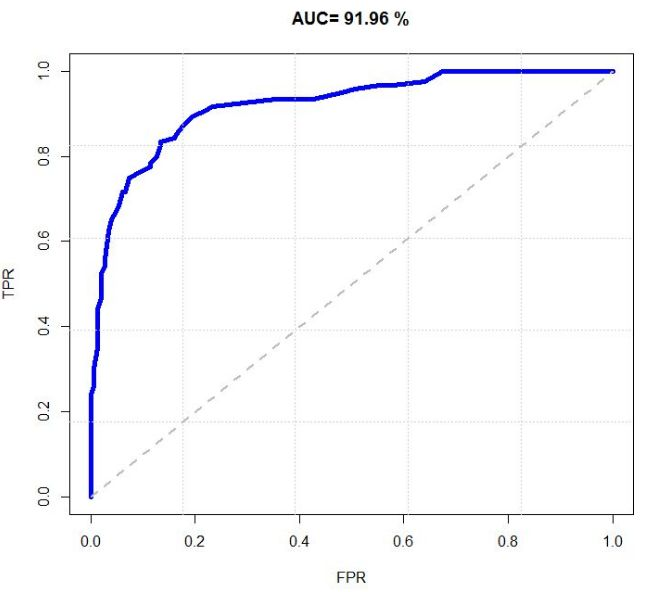

ROC曲线中的四个点：
- 点(0,1)：即FPR=0, TPR=1，意味着FN＝0且FP＝0，将所有的样本都正确分类；
- 点(1,0)：即FPR=1，TPR=0，最差分类器，避开了所有正确答案；
- 点(0,0)：即FPR=TPR=0，FP＝TP＝0，分类器把每个实例都预测为负类；
- 点(1,1)：分类器把每个实例都预测为正类 

总之：ROC曲线越接近左上角，该分类器的性能越好，其泛化性能就越好。而且一般来说，如果ROC是光滑的，那么基本可以判断没有太大的overfitting。

**但是对于两个模型，我们如何判断哪个模型的泛化性能更优呢？这里我们有主要以下两种方法：**

如果模型A的ROC曲线完全包住了模型B的ROC曲线，那么我们就认为模型A要优于模型B；

如果两条曲线有交叉的话，我们就通过比较ROC与X，Y轴所围得曲线的面积来判断，面积越大，模型的性能就越优，**这个面积我们称之为AUC(area under ROC curve)** 

如上图中的AUC为0.9196。即蓝色曲线下的面积为0.9196

## 模型调参 

调参指调整参数以获得更好的效果，其目的在于得到更好的模型，这是机器学习建模中最耗时、最复杂的部分。

与特征工程不同，特征工程更多的是需要大家熟悉数据、了解具体业务，根据实际情况进行数据的分析工作。而调参是在给定数据集下，对模型的超参数进行调整。

模型的超参数可以简答理解为模型的结构。比如我们假设数据服从标准正态分布，但是标准正太分布就包含了两个超参数——我们假设了均值为0，方差为1。

而机器学习的模型的超参数就复杂的多，这些超参数包括了模型的结构（例如树模型的深度、叶子数量等等）、模型的复杂度（包括正则化表达式、正则化程度）以及模型的类型（包括集成学校的基学习器、学习率等等）等等。简单点的模型例如逻辑回归会有几个超参数，而复杂的模型例如LightGBM则包括了数十个超参数。

根据机器学习中的“没有免费午餐定理”，没有一个固定的超参数可以适合全部的任务，因此我们必须根据实际情况进行超参数的调整，而超参数的调整是非常费时间、费精力的一件事，而且是一个经验驱动，需要大家对数据、模型的原理都非常熟悉才可以做好。因此大家需要掌握模型的原理。

下面介绍几个常见的调参的方法


**1. 贪心调参** 

先使用当前对模型影响最大的参数进行调优，达到当前参数下的模型最优化，再使用对模型影响次之的参数进行调优，如此下去，直到所有的参数调整完毕。

这个方法的缺点就是可能会调到局部最优而不是全局最优，但是只需要一步一步的进行参数最优化调试即可，容易理解。

需要注意的是在树模型中参数调整的顺序，也就是各个参数对模型的影响程度，需要对模型的参数与原理非常熟悉。

**2. 网格搜索**

该方法通过循环遍历所有超参数的备选值，尝试每一种参数组合，返回最好的得分值的参数组合。每个参数都能组合在一起，循环过程就像是在网格中遍历，所以叫网格搜索。

这个方法的缺点在于参数多的时候非常耗时。假设一个模型有5个超参数需要调整，而每个超参数有5个备选值，那么共有$5^5=3125$种参数组合，我们一般使用五折交叉验证的办法进行评估，假设每次训练模型需要1分钟，那么共需要$3125\times 5 = 15625$分钟进行调参，这是大约十天的时间。而现在的模型一般远远不止5个超参数，并且每个参数的备选值也远远不止5个，模型的训练时间更是不止1分钟。

尽管这是最暴力的调参方法，但是仍旧是当前最主要的调参方法，因为这种方法可以确保找寻到最优点。

**3.贝叶斯调参**

贝叶斯优化算法在寻找最优值参数时，采用了与网格搜索、随机搜索完全不同的方法。网格搜索和随机搜索在测试一个新点时，会忽略前一 个点的信息，而贝叶斯优化算法则充分利用了之前的信息。贝叶斯优化算法通过对目标函数形状进行学习，找到使目标函数向全局最优值提升的参数。具体来说，它学习目标函数形状的方法是，首先根据先验分布，假设 一个搜集函数，然后，每一次使用新的采样点来测试目标函数时，利用这个信息来更新目标函数的先验分布；最后，算法测试由后验分布给出的全局最值最可能出现的位置的点。对于贝叶斯优化算法，有一个需要注意的地方，一旦找到了一个局部最优值，它会在该区域不断采样，所以很容易陷入局部最优值。为了弥补这个缺陷，贝叶斯优化算法会在探索和利用之 间找到一个平衡点，“探索”就是在还未取样的区域获取采样点；而“利用”则是根据后验分布在最可能出现全局最值的区域进行采样。


**注意：** 上述的调参方法并不是固定的而是可以互相搭配使用的，例如在进行贪心算法的时候，可以选择少量重要的参数进行网格搜索或者贝叶斯调参，达到局部最优后，在进行下步的调参。

## 小结

上文中介绍了有关模型的一些内容，接下来会给出一个模型的基本建立、评估方法。这只是简单的介绍，因此很多地方可能存在一定的简化，大家如果觉得有不对的地方可以随时讨论和改进。


# 建立机器学习模型

In [1]:
import os
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False
# 解决Seaborn中文显示问题并调整字体大小
sns.set(font='SimHei')

In [2]:
data = pd.read_csv('train_EDA.csv',index_col = 0)

In [3]:
"""
这函数通过调整数据类型，帮助我们减少数据在内存中占用的空间。
这不是必要的步骤，只是因为我们数据集较大，这样可以优化性能。
大概的内容就是判断函数是object类、int类还是float类
如果是object类就转为category类（这个比object类更节省空间）
如果是int类或者float类就进而判断位数是8、16、32、64中的哪一个，然后选择能保存数据的最小位数。
"""
def reduce_mem_usage(df):
    """ 
    通过调整数据类型，帮助我们减少数据在内存中占用的空间
    -------------------------------------------
    params:df 输入数据集
    return:df 输出数据集
    """
    start_mem = df.memory_usage().sum() 
    print('原始数据内存为 {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() 
    print('使用内存减少了: {:.2f} MB'.format(end_mem))
    print('内存降低了{:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [4]:
data = reduce_mem_usage(data)

原始数据内存为 300357448.00 MB
使用内存减少了: 77487935.00 MB
内存降低了74.2%



> **注意：** 在特征工程中做了很多特征的处理，但是在这里都没有使用。这样建立的模型并非最佳的模型，因为这里只是简单介绍模型的构建步骤而已。

可以这么理解，在没有做特征工程前，我们使用预处理过的数据进行一次建模（通常被称为baseline），然后基于baseline进行特征工程，从而比较评估特征工程的效果与baseline的效果，从而选择进行何种特征工程。这是一个不断循环迭代的过程，需要根据实际需要进行不断的尝试。这里仅仅简单说明如何构建模型、如何进行评估等等步骤的代码，与实际存在一定的差异，需要大家根据实际进行改进。

因此目前的数据中还存在一些不能进行建模的数据如grade和subgrade，我们这里简单的进行OneHot编码（即虚拟变量编码）以便可以进行建模分析

In [5]:
data.drop(columns = ['grade'],inplace = True)
data = pd.get_dummies(data)

In [6]:
# 划分X和y
X = data.drop(columns = ['id','isDefault']).copy()
y = data['isDefault'].copy()

In [7]:
"""对训练集数据进行划分，分成训练集和验证集，并进行相应的操作"""
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=0,shuffle = True,test_size = 0.3)

## sklearn类模型 

sklearn，全称为scikit-learn，是一个开源的基于python语言的机器学习工具包。它通过NumPy, SciPy和Matplotlib等python数值计算的库实现高效的算法应用，并且涵盖了几乎所有主流机器学习算法。

在工程应用中，用python手写代码来从头实现一个算法的可能性非常低，这样不仅耗时耗力，还不一定能够写出构架清晰，稳定性强的模型。更多情况下，是分析采集到的数据，根据数据特征选择适合的算法，在工具包中调用算法，调整算法的参数，获取需要的信息，从而实现算法效率和效果之间的平衡。而sklearn，正是这样一个可以帮助我们高效实现算法应用的工具包。

后续许多机器学习模型的开发的接口都参考了sklearn的api（包括当前最常用的GBDT三件套：XGBoost、LightGBM和CatBoost）。

因此熟练掌握sklearn就基本上可以熟练使用绝大多数的机器学习模型，并且可以完成绝大多数的机器学习任务（除了深度学习以外）

sklearn拥有可以用于监督和无监督学习的方法，一般来说监督学习使用的更多。sklearn中的大部分函数可以归为**估计器(Estimator)** 和 **转化器(Transformer)两类**。

**估计器(Estimator)** 其实就是模型，它用于对数据的预测或回归。基本上估计器都会有以下几个方法：

- fit(x,y) :传入数据以及标签即可训练模型，训练的时间和参数设置，数据集大小以及数据本身的特点有关
- score(x,y)用于对模型的正确率进行评分(范围0-1)。但由于对在不同的问题下，评判模型优劣的的标准不限于简单的正确率，可能还包括召回率或者是查准率等其他的指标，特别是对于类别失衡的样本，准确率并不能很好的评估模型的优劣，因此在对模型进行评估时，不要轻易的被score的得分蒙蔽。
- predict(x)用于对数据的预测，它接受输入，并输出预测标签，输出的格式为numpy数组。我们通常使用这个方法返回测试的结果，再将这个结果用于评估模型。

**转化器(Transformer)** 用于对数据的处理，比如之前介绍的特征选择。同与估计器的使用方法类似:

- fit(x,y) :该方法接受输入和标签，计算出数据变换的方式。
- transform(x) :根据已经计算出的变换方式，返回对输入数据x变换后的结果（不改变x）
- fit_transform(x,y) :该方法在计算出数据变换方式之后对输入x就地转换。
以上仅仅是简单的概括sklearn的函数的一些特点。sklearn绝大部分的函数的基本用法大概如此。但是不同的估计器会有自己不同的属性，例如随机森林会有Feature_importance来对衡量特征的重要性，而逻辑回归有coef_存放回归系数intercept_则存放截距等等。并且对于机器学习来说模型的好坏不仅取决于你选择的是哪种模型，很大程度上与你超参的设置有关。因此使用sklearn的时候一定要去看看官方文档，以便对超参进行调整。



**通过sklearn实现一个机器学习模型是非常简单的,下面以逻辑回归为例说明:**

### sklearn原生模型

In [8]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0,n_jobs = 4)
lr.fit(x_train,y_train)

LogisticRegression(n_jobs=4, random_state=0)

上面就简单建立了一个逻辑回归模型，通常的模型都是可以以下三行代码进行建模


``` python
>>> from sklearn import Model_Class 
# 从sklearn中导入需要的模型类(Model_Class)，可以从sklearn的各个不同的库中导入不同的模型类，例如逻辑回归是在linear_model中，决策树在tree中，随机森林在ensemble中
>>> clf = Model_Class() 
# 实例化该模型类，这里需要理解Python的类和实例。
>>> clf.fit(x,y) 
# 通过实例对模型进行拟合，其中x为特征向量，y为目标变量。在某些预处理类的方法可能是fit_transform()，并且可能不需要y，各个模型的可能有自己独特的属性和方法，需要自行查阅不同模型的sklearn文档或者访问www.baidu.com/www.bing.com/www/google.com。
```
 

接下来再通过sklearn建立一个随机森林模型

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0,n_jobs = 4)
rf.fit(x_train,y_train)

RandomForestClassifier(n_jobs=4, random_state=0)

可以看到，除了最开始import时有区别，其它几乎一模一样。

建立其它的模型与这两个模型也是比较类似的。

但是每个模型都有自己独特的超参数需要调整，也有自己独特的方法和属性，需要在使用的时候进行了解。

### 其它模型的sklearn接口

sklearn虽然包括了绝大多数的经典模型，但是有一些比较新的模型是非sklearn的人开发的，他们自己开发的会有自己的接口api，但是绝大多数模型都有设计类似sklearn的api。如XGBoost、LightGBM等。

下面就XGBoost和LightGBM两个模型进行介绍。这两个模型是各类竞赛中被广泛使用并且被证明效果很好的模型。

In [10]:
# lightGBM模型
from lightgbm.sklearn import LGBMClassifier

lgb = LGBMClassifier(random_state=0,n_jobs=4)
lgb.fit(x_train,y_train)

LGBMClassifier(n_jobs=4, random_state=0)

In [11]:
# XGBoost模型
from xgboost.sklearn import XGBClassifier

xgb = XGBClassifier(random_state = 0,n_jobs = 4)
xgb.fit(x_train.values,y_train)

[22:12:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

**注：** 上面使用的`.values`表示将数据集从pandas形式转为numpy格式，因为XGBoost模型要求输入的特征的名称不能包括'<'符号，而我们的名称中有'employmentLength_< 1 year'，因此不转为numpy格式会报错

可以看到使用其它的模型也是基本与sklearn没有区别。

## 模型评估

### ROC曲线图

在上面我们建立了四个模型，分别是：逻辑回归模型（lr）、随机森林模型（rf）、XGBoost模型（xgb）和LightGBM模型（lgb）

我们需要评估四个模型那个比较好，根据上面的介绍，我们可以使用AUC的值和ROC曲线图进行比较。

通过sklearn计算AUC并绘制ROC曲线图同样是非常简单的。

> **注意：** 上面我们划分了训练集（x_train,y_train）和测试集(x_test,y_test)，我们所有的建模都是在训练集（x_train,y_train）上完成的。我们所有的评估都必须在测试集（x_test,y_test）上完成

In [12]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

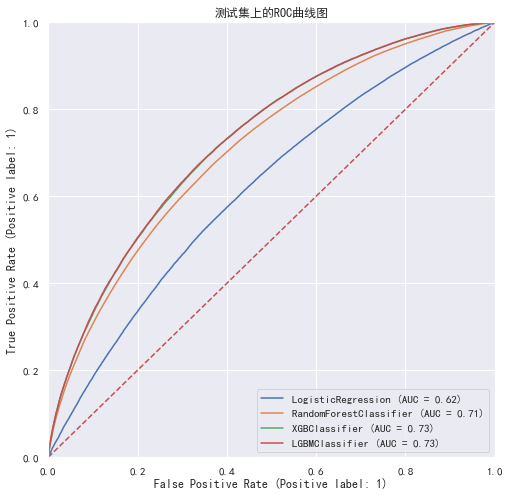

In [13]:
plt.figure(figsize=(8, 8))
plt.title('测试集上的ROC曲线图')
plt.plot([0,1],[0,1],'r--')# 画出对角线
plt.ylim(0,1)
plt.xlim(0,1)

# 绘制各个模型的ROC曲线图
ax1 = plt.gca()
RocCurveDisplay.from_estimator(lr,x_test,y_test,ax = ax1)
RocCurveDisplay.from_estimator(rf,x_test,y_test,ax = ax1)
RocCurveDisplay.from_estimator(xgb,x_test,y_test,ax = ax1)
RocCurveDisplay.from_estimator(lgb,x_test,y_test,ax = ax1)

在上图中，我们可以看到LightGBM和XGBoost的AUC都是0.73，没有什么区别。

而随机森林的AUC为0.71，比上面两个模型要稍差一些。

逻辑回归的AUC值最低，仅仅为0.62。这与之前的理论是相符的

更进一步的，使用5折交叉验证进行模型性能评估

### 5折交叉验证

我们在上面的评估中，只将数据集划分为一个训练集和测试集。尽管我们随机划分的，但是也可能存在随机误差，使得我们这次的评估是不准确的（用统计学的话说就是这次划分其实是个小概率事件，恰巧被我们撞上了）。

因此我们一般使用交叉验证的方法进行评估。所谓交叉验证，其实本质上就是将上述的步骤重复多次，只不过每次重复都是用的不一样的数据。

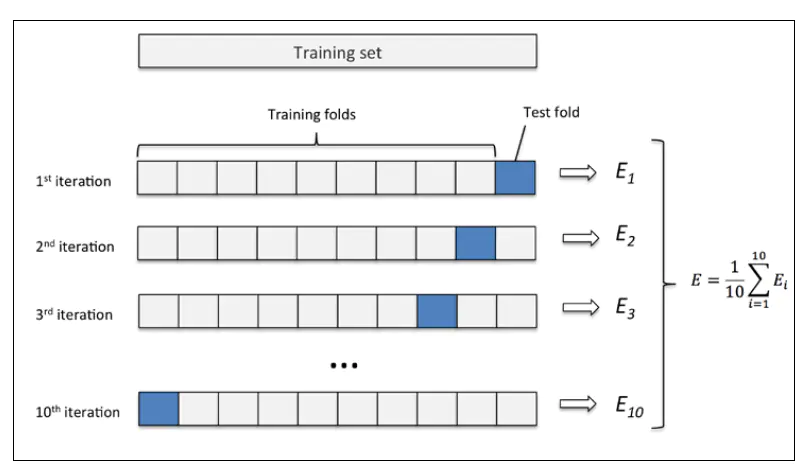



上图说明了交叉验证的基本原理，而基本的算法流程大致为下面：
```python
Step1:  将学习样本空间 C 分为大小相等的 K 份  
Step2:  for i = 1 to K ：
            取第i份作为测试集
            for j = 1 to K:
                if i != j:
                    将第j份加到训练集中，作为训练集的一部分
                end if
            end for
        end for
Step3:  for i in (K-1训练集)：
            训练第i个训练集，得到一个分类模型
            使用该模型在第N个数据集上测试，计算并保存模型评估指标
        end for
Step4:  计算模型的平均性能
Step5:  用这K个模型在最终验证集的分类准确率平均值作为此K-CV下分类器的性能指标.
```

我们以LightGBM为例子，自己实现一下五折交叉验证

In [14]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, train_test_split

kf = StratifiedKFold(random_state=0, shuffle=True, n_splits=5) 

cv_result = []
for i, (train_index, test_index) in enumerate(kf.split(X, y)): # 通过kf函数将数据集分为五等份
    x_train_cv, y_train_cv, x_test_cv, y_test_cv=X.iloc[train_index], y.iloc[
        train_index], X.iloc[test_index], y.iloc[test_index]
    lgb_5cv=LGBMClassifier(random_state=0, n_jobs=4)
    lgb_5cv.fit(x_train_cv, y_train_cv)
    lgb_5cv_pb=lgb_5cv.predict_proba(x_test_cv)[:, 1]
    auc_cv_result=roc_auc_score(y_test_cv, lgb_5cv_pb)
    cv_result.append(auc_cv_result)
    print(f'----------------------第{str(i+1)}次评估的AUC值为{round(auc_cv_result,4)}---------------------- ')

----------------------第1次评估的AUC值为0.732---------------------- 
----------------------第2次评估的AUC值为0.7346---------------------- 
----------------------第3次评估的AUC值为0.7312---------------------- 
----------------------第4次评估的AUC值为0.7322---------------------- 
----------------------第5次评估的AUC值为0.7318---------------------- 


In [15]:
np.mean(cv_result),np.std(cv_result)

(0.7323487679070089, 0.001156308051845065)

可以看到，五折交叉验证的分数是比较接近的，说明我们的划分没有太大问题。也保证了我们的结果是比较稳健的。

而在sklearn中提供了直接的交叉验证的检验的函数。我们可以更快捷方便的进行交叉验证

In [16]:
# 通过sklearn的函数进行交叉验证
from sklearn.model_selection import cross_validate

lgb_5cv_sklearn=LGBMClassifier(random_state=0, n_jobs=4)
cross_validate(lgb_5cv_sklearn,X,y,cv=kf,scoring='roc_auc')

{'fit_time': array([5.04866767, 5.65800929, 6.20760202, 6.63328981, 6.46458888]),
 'score_time': array([0.4288528 , 0.45578003, 0.4647572 , 0.45260644, 0.43084764]),
 'test_score': array([0.73204756, 0.73455413, 0.7311746 , 0.7321909 , 0.73177665])}

cross_validate函数得到的结果与我们自己的结果是一样的。同时还补充了fit_time、score_time等结果。

## 小结 

在上面我们构建了一些模型的基础形式，但是没有经过超参数的调整。下面介绍如何进行超参数调整。

# 模型调参

我们以lightGBM为例进行各类调参算法的演示。

LIghtGBM大概有以下的核心超参数需要调整：

   1. **learning_rate**: 学习率。默认设置为0.1，一般设置在0.05-0.1之间。选择比较小的学习率能获得稳定较好的模型性能。
   2. **n_estimators**: boosting的迭代次数。默认设置为100。一般根据数据集和特征数据选择100~1000之间。更保守的做法是设置一个较大的值配合early_stopping_round来让模型根据性能自动选择最好        的迭代次数。选择比较大的迭代次数会在训练集获得比较好的性能但容易过拟合造成测试集的性能下降。
   3. **min_split_gain**: 执行节点分裂的最小增益。默认设置为0。不建议去调整。增大这个数值会得到相对浅的树深。可调整其他参数得到类似效果。
   4. **min_child_sample**: 一个叶子上的最小数据量。默认设置为20。根据数据量来确定，当数据量比较大时，应该提升这个数值，让叶子节点的数据分布相对稳定，提高模型的泛华能力。
   5. **min_child_weight**: 一个叶子上的最小hessian和。默认设置为0.001，一般设置为1。不建议调整，增大数值会得到较浅的树深。
   6. **max_depth**: 树模型的最大深度。防止过拟合的最重要的参数，一般限制为3~5之间。是需要调整的核心参数，对模型性能和泛化能力有决定性作用。
   7. **num_leaves**: 一棵树上的叶子节点个数。默认设置为31，和max_depth配合来空值树的形状，一般设置为(0, 2^max_depth - 1]的一个数值。是一个需要重点调节的参数，对模型性能影响很大。
   8. **subsample**: 若此参数小于1.0，LightGBM将会在每次迭代中在不进行重采样的情况下随机选择部分数据（row），可以用来加速训练及处理过拟合。默认设置为1，一般设置为0。8~1.0之间，防止过拟合。
   9. **colsample_bytree**: 若此参数小于1.0，LightGBM将会在每次迭代中随机选择部分特征(col)，可以用来加速训练及处理过拟合。默认设置为1，一般设置为0.8~1.0之间，防止过拟合4
   10. **reg_alpha**: L1正则化参数，别名：lambda_l1。默认设置为0。一般经过特征选择后这个参数不会有特别大的差异，如果发现这个参数数值大，则说明有一些没有太大作用的特征在模型内。需要调节来控制过拟合
   11. **reg_lambda**: L2正则化参数，别名：lambda_l2。默认设置为0。较大的数值会让各个特征对模型的影响力趋于均匀，不会有单个特征把持整个模型的表现。需要调节来控制过拟合

**注：** 上面的顺序不代表参数的重要程度。

除了上面的这些超参数以外，还有大量的参数也是可以进行调整的。
具体的参数列表请查阅官方文档：https://lightgbm.readthedocs.io/en/latest/Parameters.html
> **注意：** 由于运行的时间问题，这里只展示了一个简单的流程，因此这里只调整learning_rate和n_estimators两个参数，并且参数的备选值也会大量减少。

此外，请注意，我们一开始划分了训练集和测试集，我们所有的超参数的调整是只能在训练集上进行的，而**不能使用测试集进行超参数调整**。

我们依然使用交叉验证的办法继续模型评估，但是这次的交叉验证仅仅是在训练集上进行，而不是在全部数据集上进行。

我们可以这么理解，如果把模型理解成学生，那么训练集就是平时的上课，而测试集就是最后的期末考试。超参数调参是上课的一种方式，如果使用了测试集的话，就相当于学生提前获得了考试的题目，那么考试的分数就不能准确的衡量学生的学习程度。

## 贪心调参

贪心算法是一个分步的调参方法，我们先对learning_rate进行调参，在learning_rate达到局部最优后，进而对n_estimators进行调参。

In [17]:
from sklearn.model_selection import validation_curve

lr_range = [0.01, 0.1, 1]  # 我们先训练学习率，由于时间关系，我们只在三个学习率中进行调整

lgb_params_tune1 = LGBMClassifier(random_state=0, n_jobs=4)
kf = StratifiedKFold(random_state=0, shuffle=True, n_splits=5)

# 通过validation_curve获取在训练集和测试集上的分数（这里的训练集和测试集是在原本的训练集进行五折交叉分出来的。）
train_scores, test_scores = validation_curve(
    lgb_params_tune1, x_train, y_train, param_name='learning_rate', param_range=lr_range, scoring='roc_auc')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

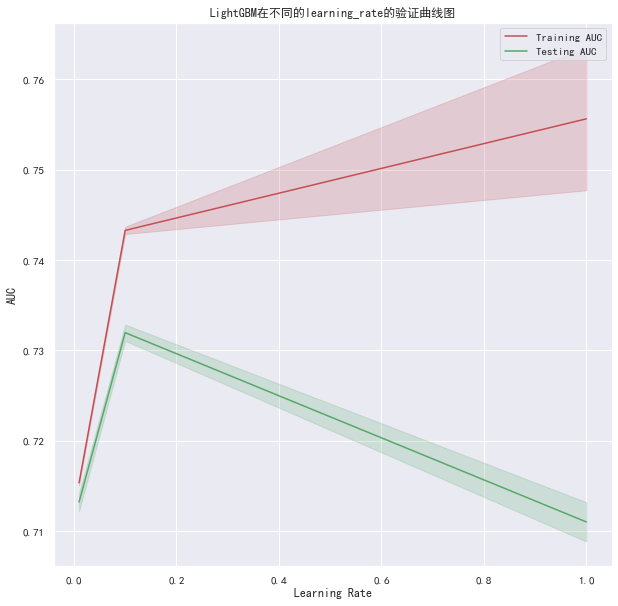

In [18]:
# 绘图查看
fig = plt.figure(figsize = (10,10))

plt.plot(lr_range, train_scores_mean,
            label="Training AUC", color="r")
plt.fill_between(lr_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.plot(lr_range, test_scores_mean,
            label="Testing AUC", color="g")
plt.fill_between(lr_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2, color="g")

plt.title("LightGBM在不同的learning_rate的验证曲线图")
plt.xlabel("Learning Rate")
plt.ylabel("AUC")
plt.legend(loc='best')

从上图中可以看到，learning_rate在0.01时，训练集和测试集的AUC都比较低，当learning_rate到了0.1的时候，两者都有一定的升高，而当learning_rate到了1的时候，训练集AUC继续升高，但是测试集的AUC反而降低，说明这里出现了**过拟合**的现象。

同时请注意，虽然上图中是曲线图，但是我们实际上只有三个点，因此在0.1到1之间虽然图中测试集的AUC是直接向下的，但是可能中间存在某个区间测试集AUC仍然是提高的，只是没有在这个图中展示。

根据贪心算法，我们选择0.1作为learning_rate的参数进行下一步调参。

In [19]:
n_estimators_range = [10, 50, 100]  # 进一步选择n_estimator参数，同样只在三个参数里面进行选择

lgb_params_tune1 = LGBMClassifier(random_state=0, n_jobs=4,learning_rate=0.1) #这里我们根据上面选择的learning_rate更新模型
kf = StratifiedKFold(random_state=0, shuffle=True, n_splits=5)

# 通过validation_curve获取在训练集和测试集上的分数（这里的训练集和测试集是在原本的训练集进行五折交叉分出来的。）
train_scores, test_scores = validation_curve(
    lgb_params_tune1, x_train, y_train, param_name='n_estimators', param_range=n_estimators_range, scoring='roc_auc')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

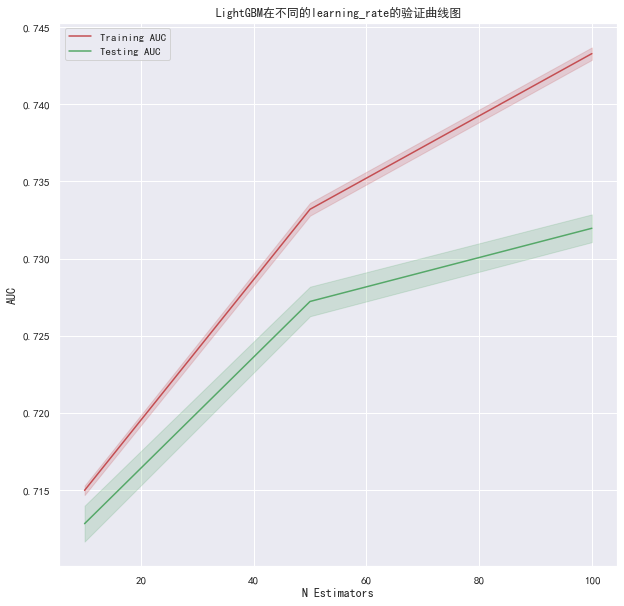

In [20]:
# 绘图查看
fig = plt.figure(figsize = (10,10))

plt.plot(n_estimators_range, train_scores_mean,
            label="Training AUC", color="r")
plt.fill_between(n_estimators_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.plot(n_estimators_range, test_scores_mean,
            label="Testing AUC", color="g")
plt.fill_between(n_estimators_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2, color="g")

plt.title("LightGBM在不同的learning_rate的验证曲线图")
plt.xlabel("N Estimators")
plt.ylabel("AUC")
plt.legend(loc='best')

可以看到，尽管存在一定的过拟合的趋势（训练集和测试集的AUC的差距在不断扩大），但是测试集上的AUC一直在上升，因此我们还是选择n_estimators为100。

## 网格搜索

接下来通过网格搜索进行模型的参数调整 

In [21]:
from sklearn.model_selection import GridSearchCV

# 网格搜索Step1： 构建全部备选值的参数组合网格
param_grid = {
    "learning_rate": [0.01, 0.1, 1],
    "n_estimators": [10, 50, 100]
}

# 网格搜索Step2：构建原始模型

lgb_params_tune2 = LGBMClassifier(random_state=0, n_jobs=4)

# 网格搜索Step3： 通过GridSearchCVC函数构建网格搜索模型（可以将网格搜索理解为sklearn的一个模型，拥有类似的接口）

cv_grid = GridSearchCV(estimator=lgb_params_tune2,
                       cv=kf,
                       param_grid=param_grid,
                       scoring='roc_auc')
cv_grid.fit(x_train, y_train)
print('模型当前最优参数为:{}'.format(cv_grid.best_params_))
print('模型当前最优得分为:{}'.format(cv_grid.best_score_))

模型当前最优参数为:{'learning_rate': 0.1, 'n_estimators': 100}
模型当前最优得分为:0.7320845750343515


通过网格搜索找到的参数与我们贪心算法的参数是一致的。说明这个参数组合在当前的参数网格中是最优的，但是由于我们的参数网格比较小，因此还不一定是全局最优的。

## 贝叶斯调参 


贝叶斯调参有许多开源的软件包，在这里使用的是bayesian-optimization。可以运行如下命令进行安装：
>  `pip install bayesian-optimization`

贝叶斯调参的一般步骤如下
- Step1：定义优化函数
- Step2：定义待优化的参数与参数空间
- Step3：建立贝叶斯调参模型
- Step4：进行贝叶斯调参

In [22]:
# Step1：定义优化函数
# 我们的优化目标是使得AUC值最大，为了保证稳健性，我们使用五折交叉的平均值作为目标。
from sklearn.model_selection import cross_val_score


def rf_cv_lgb(learning_rate, n_estimators):
    # 建立模型
    model_lgb = LGBMClassifier(
        random_state=0, n_jobs=4, learning_rate=learning_rate, n_estimators=int(n_estimators))

    val = cross_val_score(model_lgb, x_train,
                          y_train, cv=kf, scoring='roc_auc').mean()

    return val

In [23]:
# Step2：定义待优化的参数与参数空间
# 这里的参数空间与网格搜索不一样，这是在连续空间中进行搜索。网格搜索是在离散空间。
param_grid = {
    "learning_rate": (0.01,1),
    "n_estimators": (10,100),
}

In [24]:
# Step3：建立贝叶斯调参模型

from bayes_opt import BayesianOptimization
bayes_lgb = BayesianOptimization(
    rf_cv_lgb, 
    pbounds = param_grid,
    random_state = 0,
)

# Step进行贝叶斯调参
bayes_lgb.maximize()

|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
|  1        |  0.7236   |  0.5533   |  74.37    |
|  2        |  0.7229   |  0.6067   |  59.04    |
|  3        |  0.7268   |  0.4294   |  68.13    |
|  4        |  0.7256   |  0.4432   |  90.26    |
|  5        |  0.7175   |  0.964    |  44.51    |
|  6        |  0.7167   |  0.7804   |  95.87    |
|  7        |  0.7226   |  0.638    |  59.05    |
|  8        |  0.7191   |  0.721    |  67.74    |
|  9        |  0.7317   |  0.1979   |  68.23    |
|  10       |  0.7248   |  0.4689   |  90.27    |
|  11       |  0.7315   |  0.228    |  68.44    |
|  12       |  0.7139   |  0.01637  |  68.68    |
|  13       |  0.7306   |  0.09078  |  83.29    |
|  14       |  0.7277   |  0.4187   |  68.4     |
|  15       |  0.7221   |  0.8323   |  25.14    |
|  16       |  0.7299   |  0.3046   |  83.26    |
|  17       |  0.732    |  0.1786   |  83.06    |
|  18       |  0.7263   |  0.4214   |  82.91    |


In [25]:
bayes_lgb.max

{'target': 0.7319643300015537,
 'params': {'learning_rate': 0.17859044388156434,
  'n_estimators': 83.05857982858916}}

我们通过了三类的超参数的调整，我们比较一下调整超参数的结果。由于我们的调整是比较粗糙的，因此很可能是没有较好的效果的。

In [26]:
# 默认的模型
lgb_default = LGBMClassifier(random_state=0,n_jobs = 4)
# 经过贪心调参的模型
lgb_params_tune1 = LGBMClassifier(random_state=0, n_jobs=4,learning_rate=0.1,n_estimators=100)
# 经过贝叶斯调参的模型
lgb_params_tune2 = LGBMClassifier(random_state=0, n_jobs=4,learning_rate=0.1164,n_estimators=83)

In [27]:
cross_validate(lgb_default,X,y,cv=kf,scoring='roc_auc')

{'fit_time': array([6.80362535, 5.7481389 , 6.50404096, 6.39393067, 6.44501758]),
 'score_time': array([0.49351931, 0.48756719, 0.46326518, 0.45731211, 0.45979142]),
 'test_score': array([0.73204756, 0.73455413, 0.7311746 , 0.7321909 , 0.73177665])}

In [28]:
cross_validate(lgb_params_tune1,X,y,cv=kf,scoring='roc_auc')

{'fit_time': array([5.56759453, 6.64242554, 5.8101387 , 6.75898552, 6.87852168]),
 'score_time': array([0.49153543, 0.48806429, 0.48459125, 0.47665596, 0.47516823]),
 'test_score': array([0.73204756, 0.73455413, 0.7311746 , 0.7321909 , 0.73177665])}

In [29]:
cross_validate(lgb_params_tune2,X,y,cv=kf,scoring='roc_auc')

{'fit_time': array([5.85874629, 5.7049861 , 5.64745235, 5.65092301, 5.58545089]),
 'score_time': array([0.42804813, 0.40225554, 0.4022541 , 0.42507243, 0.41465569]),
 'test_score': array([0.73191301, 0.73419436, 0.73071368, 0.73190269, 0.73121359])}

可以看到默认模型的分数与网格搜索的分数是一致的(因为默认的参数就是这两个，这也说明我们当前的调整是特别粗糙的)
而贝叶斯调参的参数效果甚至要差一点，因为贝叶斯更容易陷入局部最优，而达不到当前的最优，但是如果扩大参数空间，那么更有可能达到全局最优

这也说明了更复杂的方法并不一定更有效，需要根据不同的情况进行调整与使用。

## 小结

这一节对三类超参数的调节进行了演示，但是整个调整是非常粗糙并且效果并不明显，实际中需要更精细的调整以达到最佳的效果。

# 模型保存 

python中训练模型并保存是非常简单的一件事

In [30]:
import joblib
joblib.dump(lgb_default,'LGB_Model.m')

['LGB_Model.m']

通过上面一行代码，我们就将训练好的模型保存成一个二进制文件"LGB_Model.m"，当我们需要再次使用该模型的时候，我们就不需要进行再次的训练了。可以通过以下代码直接引入这个模型进行预测。

```python
# 导入模型
>>> import joblib
>>> lgb_default_import = joblib.load('LGB_Model.m')
```
这样导入的模型lgb_default_import与当前训练好的模型lgb_default就是同一个模型

# 总结
这里我们主要完成了建模与调参的工作，首先在建模的过程中通过划分数据集、交叉验证等方式对模型的性能进行评估验证，并通过可视化方式绘制模型ROC曲线


最后我们对模型进行调参，这部分介绍了贪心调参、网格搜索调参、贝叶斯调参共三种调参手段大家在实际操作的过程中可以参考调参思路进行优化，不必拘泥于以上教程所写的具体实例。

经过三个大的步骤的实战，展示了一个简单的机器学习的建模全过程，这里的教程是非常粗糙且简陋的，有许多的细节需要大家自行学习与掌握。